In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

import warnings
warnings.filterwarnings('ignore')

In [7]:
weather_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/weatherHistory.csv")
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Hedef değişkenin sıcaklık olduğu bir regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem, rüzgar hızı, rüzgar ve basınç kullanın. OLS kullanarak modeli tahmin edin.

In [9]:
y=weather_df["Temperature (C)"]

In [10]:
x=weather_df[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]]

In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Humidity                96453 non-null  float64
 1   Wind Speed (km/h)       96453 non-null  float64
 2   Wind Bearing (degrees)  96453 non-null  float64
 3   Pressure (millibars)    96453 non-null  float64
dtypes: float64(4)
memory usage: 2.9 MB


In [12]:
lr = linear_model.LinearRegression()
model = lr.fit(x, y)
print("R^2 is: \n", model.score(x, y))

R^2 is: 
 0.4205778630374368


In [13]:
import statsmodels.api as sm
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:14:17   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9264      0.233    162.709      0.000      37.470      38.383
Humidity                 -32.4962      0.123   -264.288      0.000     -32.737     -32.255
Wind Speed (km/h)         -0.2014      0.003    -57.557      0.000      -0.208      -0.195
Wind Bearing (degrees)     0.0040      0.000     18.463      0.000       0.004       0.004
Pressure (millibars)      -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Şimdi, modelinizin yukarıdaki Gauss-Markov Koşullarını karşılayıp karşılamadığını kontrol edin. Eğer bazı varsayımlar karşılanmazsa, modelinizin doğruluğu için ihlallerin etkilerini tartışın.

Katsayılarda modelin doğrusallığı

Hata terimi ortalamada sıfır olmalıdır. Modelimizde sabit eklediğimizden problem olmayacaktır gene de bakalım.

In [14]:
tahmin = results.predict(x)
hatalar = y - tahmin

print("modelinin ortalama hatası : {:.15f}".format(np.mean(hatalar)))
#düşük oldğu görülür.

Tıbbi maliyetler modelinin ortalama hatası : 0.000000000010387


Üçüncü varsayım homoscedasticity gerekliliğidir.

In [15]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

#Her iki testin p değerleri 0.05'ten düşüktür. 
#Dolayısıyla, test sonuçları null hipotezini reddeder, bu da hatalarımızın heteroscedastic olduğu anlamına gelir.

Bartlett test değeri : 2464.84 ve p değeri : 0.000000000000000000000
Levene test değeri   : 2321.24 ve p değeri : 0.000000000000000000000


4.düşük çoklu doğrusallık/low multicollinearity

In [14]:
#Featurelerın korelasyon matrisine bakarız. PCA ya da başka özniteliklerin çıkarılmasıyla giderebiliriz.
x.corr()

,const,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
const,NaN,NaN,NaN,NaN,NaN
Humidity,NaN,1.000000,-0.224951,0.000735,0.005454
Wind Speed (km/h),NaN,-0.224951,1.000000,0.103822,-0.049263
Wind Bearing (degrees),NaN,0.000735,0.103822,1.000000,-0.011651
Pressure (millibars),NaN,0.005454,-0.049263,-0.011651,1.000000


 5: hata terimleri birbiriyle ilişkisiz olmalıdır

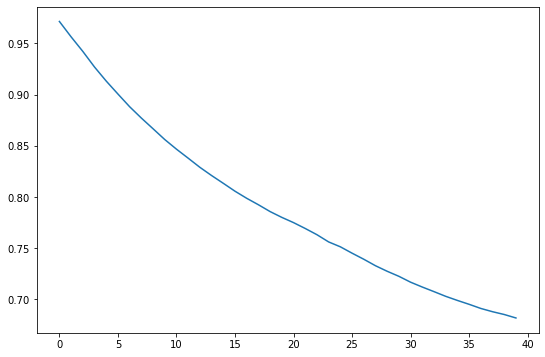

In [24]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()
#modelimizin hataları arasındaki otokorelasyon gerçekten yüksektir. (düşüklük: örn:-0,06 ile 0,05 arasında).

6: özellikler hatalarla korele olmamalıdır??

Hataların normalliği?

In [25]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
jb_stats = jarque_bera(hatalar)
norm_stats = normaltest(hatalar)

print("Jarque-Bera test değeri : {0} ve p değeri : {1}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0}  ve p değeri : {1:.30f}".format(norm_stats[0], norm_stats[1]))

#Her iki testin p-değerleri, hatalarımızın normal olarak dağılmadığını gösterir.(<0.5)

Jarque-Bera test değeri : 3793.2967352522546 ve p değeri : 0.0
Normal test değeri      : 3375.4323076995015  ve p değeri : 0.000000000000000000000000000000


Bir çok varsayımı karşılamamaktadır.

Ev fiyatları verseti ile de lineer regresyonun varsayımlarına bakalım.

In [16]:
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")

In [20]:
df=house_prices_df[["SalePrice","BldgType","YearBuilt","FullBath","BedroomAbvGr","OverallQual","GarageCars","Street","GrLivArea"]]

In [28]:
X1 = df.drop(['SalePrice'], axis=1)
y1 = np.log(df.SalePrice)
X1=pd.get_dummies(X1)

In [29]:
lrm = linear_model.LinearRegression()
model2 = lrm.fit(X1, y1)
print("R^2 is: \n", model2.score(X1, y1))

R^2 is: 
 0.8146524083897067


In [30]:
X1 = sm.add_constant(X1)
result = sm.OLS(y1, X1).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     578.6
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:19:32   Log-Likelihood:                 499.07
No. Observations:                1460   AIC:                            -974.1
Df Residuals:                    1448   BIC:                            -910.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.7140      0.246     11.051      0.000       2.232       3.196
YearBuilt           0.0031      0.000     14.218      0.000       0.003       0.004
FullBath           -0.0033      0.012     -0.272      0.786      -0.027       0.021
BedroomAbvGr       -0.0192      0.007     -2.621      0.009      -0.034      -0.005
OverallQual         0.1084      0.005     20.214      0.000       0.098       0.119
GarageCars          0.0852      0.008     10.244      0.000       0.069       0.102
GrLivArea           0.0003   1.47e-05     18.929      0.000       0.000       0.000
BldgType_1Fam       0.6352      0.050     12.730      0.000       0.537       0.733
BldgType_2fmCon     0.6199      0.051     12.084      0.000       0.519       0.721
BldgType_Duplex     0.5199      0.054      9.540      0.000       0.413       0.627
BldgType_Twnhs      0.4067      0.057      7.150      0.000       0.295       0.518
BldgType_TwnhsE     0.5324      0.054      9.825      0.000       0.426       0.639
Street_Grvl         1.3094      0.131     10.018      0.000       1.053       1.566
Street_Pave         1.4045      0.125     11.235      0.000       1.159       1.650
==============================================================================
Omnibus:                      637.371   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10340.008
Skew:                          -1.603   Prob(JB):                         0.00
Kurtosis:                      15.637   Cond. No.                     8.50e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.27e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
tahmin = result.predict(X1)
hatalar = y1 - tahmin

print("modelinin ortalama hatası : {:.15f}".format(np.mean(hatalar)))
#düşük oldğu görülür.

modelinin ortalama hatası : 0.000000000000003


In [33]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

#Her iki testin p değerleri 0.05'ten düşüktür. 
#Dolayısıyla, test sonuçları null hipotezini reddeder, bu da hatalarımızın heteroscedastic olduğu anlamına gelir.

Bartlett test değeri : 735.407 ve p değeri : 0.000000000000000000000
Levene test değeri   : 736.681 ve p değeri : 0.000000000000000000000


Heteroscedasticlikle ilgili bir sürü durum olabilir. Aykırı değerler ve hedef değişkenin varyansını açıklamakta önemli olan değişkenlerin ihmal edilmesi yer almaktadır. Bu nedenle, aykırı değerlerle baş etmek ve ilgili değişkenleri dahil etmek, Heteroscedasticity sorununu düzeltmeye yardımcı olur.

In [34]:
X1.corr()

,const,YearBuilt,FullBath,BedroomAbvGr,OverallQual,GarageCars,GrLivArea,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Street_Grvl,Street_Pave
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,1.000000,0.468271,-0.070651,0.572323,0.537850,0.199010,-0.119096,-0.206036,-0.026063,0.086878,0.238477,-0.021137,0.021137
FullBath,NaN,0.468271,1.000000,0.363252,0.550600,0.469672,0.630012,-0.078467,-0.004461,0.084664,0.012520,0.044417,-0.046471,0.046471
BedroomAbvGr,NaN,-0.070651,0.363252,1.000000,0.101676,0.086106,0.521270,0.169838,0.088210,0.162898,-0.105598,-0.327986,-0.028865,0.028865
OverallQual,NaN,0.572323,0.550600,0.101676,1.000000,0.600671,0.593007,0.035872,-0.123989,-0.158156,-0.003723,0.128662,-0.058823,0.058823
GarageCars,NaN,0.537850,0.469672,0.086106,0.600671,1.000000,0.467247,0.039851,-0.106724,-0.024193,-0.075845,0.066799,0.020025,-0.020025
GrLivArea,NaN,0.199010,0.630012,0.521270,0.593007,0.467247,1.000000,0.103134,0.012894,0.018967,-0.079272,-0.112542,-0.044121,0.044121
BldgType_1Fam,NaN,-0.119096,-0.078467,0.169838,0.035872,0.039851,0.103134,1.000000,-0.332077,-0.433286,-0.392757,-0.656152,-0.058171,0.058171
BldgType_2fmCon,NaN,-0.206036,-0.004461,0.088210,-0.123989,-0.106724,0.012894,-0.332077,1.000000,-0.028305,-0.025657,-0.042864,0.064806,-0.064806
BldgType_Duplex,NaN,-0.026063,0.084664,0.162898,-0.158156,-0.024193,0.018967,-0.433286,-0.028305,1.000000,-0.033477,-0.055928,0.103192,-0.103192


<AxesSubplot:>

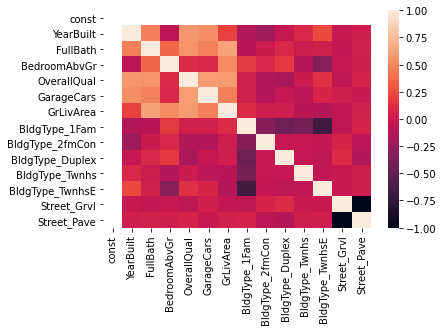

In [42]:
sns.heatmap(X1.corr())

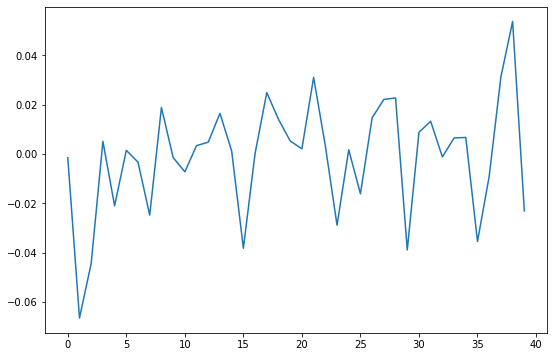

In [40]:
## from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()
#modelimizin hataları arasındaki otokorelasyon gerçekten düşüktür. 

bazı varsayımları karşılıyor bazılarını karşılamıyor ancak model r^2 den dolayı kullanılabilir.